<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Square_of_Zeroes_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Square of Zeroes

Write a function that takes in a square-shaped n x n two-dimensional array of only 1s and 0s and returns a boolean representing whether the input matrix contains a square whose borders are made up of only 0s.

Note that a 1 x 1 square doesn't count as a valid square for the purpose of this question. In other words, a singular `0` in the input matrix doesn't constitute a square whose borders are made up of only 0s; a square of zeroes has to be at least 2 x 2.

Sample Input

```
matrix = [
  [1, 1, 1, 0, 1, 0],
  [0, 0, 0, 0, 0, 1],
  [0, 1, 1, 1, 0, 1],
  [0, 0, 0, 1, 0, 1],
  [0, 1, 1, 1, 0, 1],
  [0, 0, 0, 0, 0, 1],
]
```



Sample Output

```
true
[
  [ ,  ,  ,  ,  ,  ],
  [0, 0, 0, 0, 0,  ],
  [0,  ,  ,  , 0,  ],
  [0,  ,  ,  , 0,  ],
  [0,  ,  ,  , 0,  ],
  [0, 0, 0, 0, 0,  ],
]
```



## Solution 1

- iterate 3 nested loop to identify all square
- each square iterate 2 series for loop O(n) to check all perimeter whert it is all 0 or not.

In [1]:
# Time O(n^4)
# Space O(1)

def squareOfZeroes(matrix):
  n = len(matrix)
  for row1 in range(n):
    for col1 in range(n):
      square_size = 2
      while square_size <= n - col1 and square_size <= n - row1:
        row2 = row1 + square_size - 1
        col2 = col1 + square_size - 1
        # time O(n)
        if is_zeroes_perimeter(matrix, row1, row2, col1, col2):
          return True
        square_size += 1
  return False

def is_zeroes_perimeter(matrix, row1, row2, col1, col2):
  for row in range(row1, row2 + 1):
    if matrix[row][col1] != 0 or matrix[row][col2] != 0:
      return False
  for col in range(col1, col2 + 1):
    if matrix[row1][col] != 0 or matrix[row2][col] != 0:
      return False
  return True

In [2]:
matrix = [
  [1, 1, 1, 0, 1, 0],
  [0, 0, 0, 0, 0, 1],
  [0, 1, 1, 1, 0, 1],
  [0, 0, 0, 1, 0, 1],
  [0, 1, 1, 1, 0, 1],
  [0, 0, 0, 0, 0, 1],
]
print(squareOfZeroes(matrix))

True


## Solution 2

In [3]:
# Time O(n^3)
# Space O(n^2)

def squareOfZeroes(matrix):
	info_matrix = compute_zoroes_above_left(matrix)
	n = len(matrix)
	for row1 in range(n):
		for col1 in range(n):
			square_size = 2
			while square_size <= n - col1 and square_size <= n - row1:
				row2 = row1 + square_size - 1
				col2 = col1 + square_size - 1
        # time O(1)
				if is_zeroes_perimeter(info_matrix, row1, row2, col1, col2):
					return True
				square_size += 1
	return False

def is_zeroes_perimeter(info_matrix, row1, row2, col1, col2):
	square_size = row2 - row1 + 1
	has_top = info_matrix[row1][col2]['num_zeroes_left'] >= square_size
	has_bottom = info_matrix[row2][col2]['num_zeroes_left'] >= square_size
	has_left = info_matrix[row2][col1]['num_zeroes_above'] >= square_size
	has_right = info_matrix[row2][col2]['num_zeroes_above'] >= square_size
	return has_top and has_bottom and has_left and has_right

def compute_zoroes_above_left(matrix):
	n = len(matrix)
	info_matrix = [[0 for _ in range(n)] for _ in range(n)]

	for row in range(n):
		for col in range(n):
			num_zeroes = 1 if matrix[row][col] == 0 else 0
			info_matrix[row][col] = {'num_zeroes_above': num_zeroes, 'num_zeroes_left': num_zeroes}

	for row in range(n):
		for col in range(n):
			if matrix[row][col] == 1:
				continue
			if row > 0:
				info_matrix[row][col]['num_zeroes_above'] += info_matrix[row - 1][col]['num_zeroes_above']
			if col > 0:
				info_matrix[row][col]['num_zeroes_left'] += info_matrix[row][col - 1]['num_zeroes_left']

	return info_matrix

In [4]:
matrix = [
  [1, 1, 1, 0, 1, 0],
  [0, 0, 0, 0, 0, 1],
  [0, 1, 1, 1, 0, 1],
  [0, 0, 0, 1, 0, 1],
  [0, 1, 1, 1, 0, 1],
  [0, 0, 0, 0, 0, 1],
]
print(squareOfZeroes(matrix))

True


### Conceptual note

- Create info matrix that store the count of no. on zeroes on above and left of each element including itself.
- 3 nested loop for all possible square and check 3 corner of the square whert it is all zeroes perimeter or not.

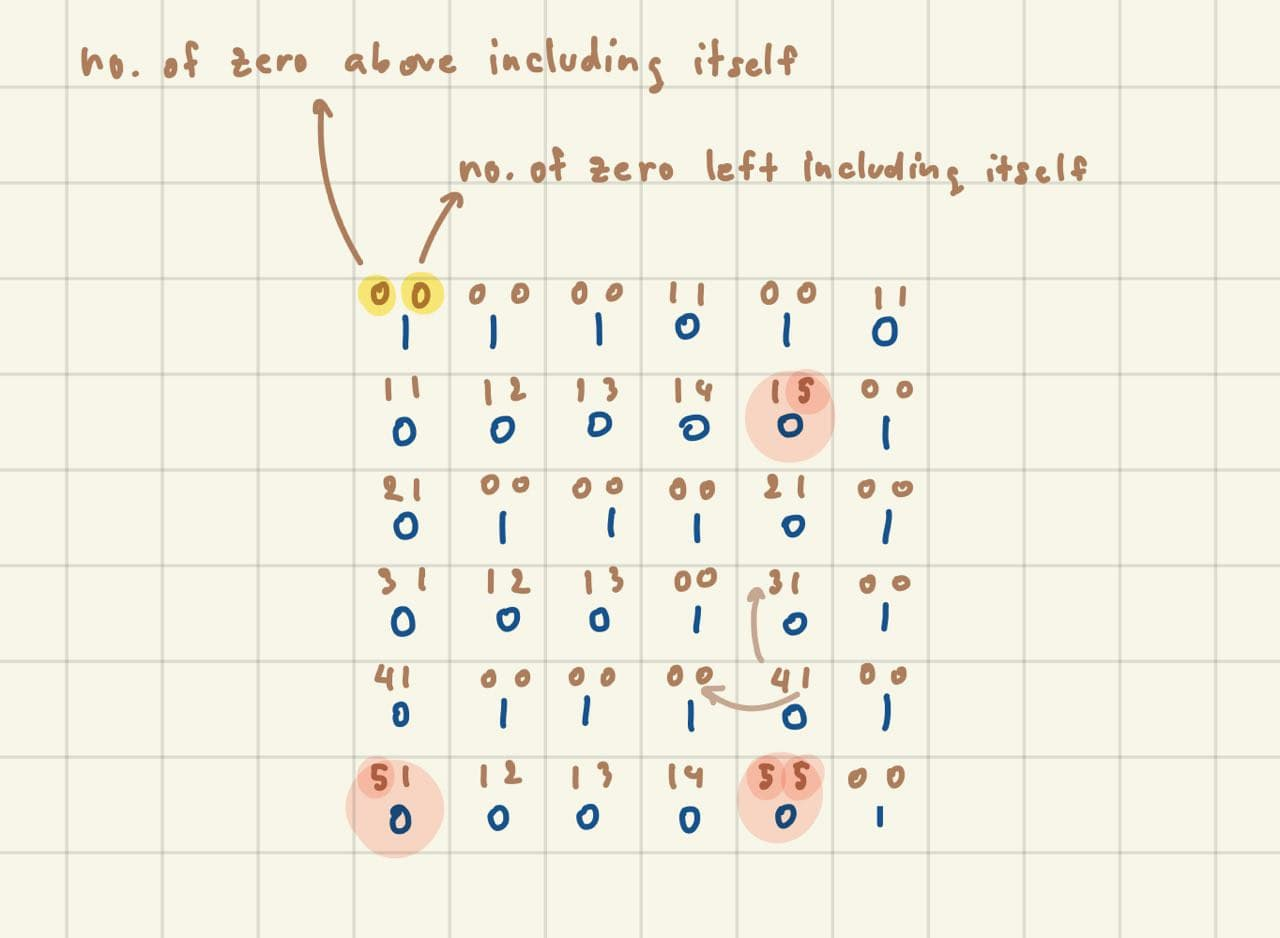